In [2]:
import joblib
# Load the saved model from file using joblib
random_model = joblib.load('random_model.joblib')


In [3]:
gradient_model = joblib.load('gradientBoosting.joblib')

In [4]:
xgboost_model = joblib.load('xgb_model.joblib')

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('dataset/final_clean_encoded.csv')

In [11]:
data = df.drop('Accident_Severity', axis = 1)

labels = df['Accident_Severity']

In [12]:
from imblearn.over_sampling import SMOTENC
# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(30))

smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_resampled , y_resampled = smote.fit_resample(data,labels)
X_resampled.shape, y_resampled.shape

/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:572: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/home/rajkumar/anaconda3/envs/pyenv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


((31245, 31), (31245,))

In [13]:
data = X_resampled
labels = y_resampled

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size = 0.25, random_state = 42, stratify = labels)

In [15]:
from sklearn.ensemble import VotingClassifier

# Create a list of tuples for the models to be used in the voting classifier
estimators = [
    ('random', random_model),
    ('gradient', gradient_model),
    ('xgboost', xgboost_model)
]

# Create the voting classifier
voting_clf = VotingClassifier(estimators, voting='hard')

# Fit the voting classifier on training data
voting_clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = voting_clf.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
classif_re = classification_report(y_test,y_pred)
print(classif_re)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2604
           1       0.91      0.87      0.89      2604
           2       0.87      0.90      0.89      2604

    accuracy                           0.92      7812
   macro avg       0.92      0.92      0.92      7812
weighted avg       0.92      0.92      0.92      7812



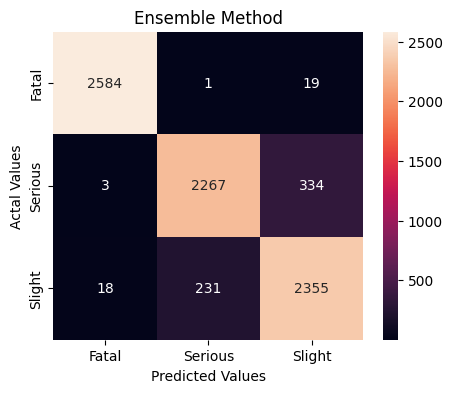

In [17]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)


# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Fatal','Serious','Slight'], 
                     columns = ['Fatal','Serious','Slight'])



plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.title("Ensemble Method")
plt.show()

In [19]:
joblib.dump(voting_clf , 'ensemble_model.joblib')


['ensemble_model.joblib']